## Problem Set #4

MACS 30150, Dr. Evans

Ruoyun Tan

In [188]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math

### Problem 1

#### (a)

In [203]:
incomes = np.loadtxt("data/incomes.txt")

Text(0, 0.5, 'Percent of incomes')

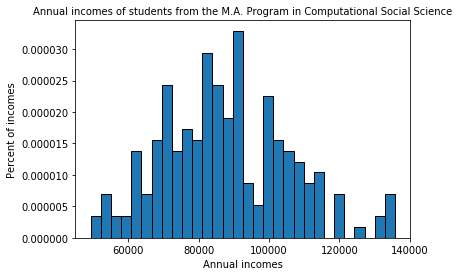

In [204]:
num_bins = 30
plt.hist(incomes, num_bins, density=True, edgecolor='k')
plt.title('Annual incomes of students from the M.A. Program in Computational Social Science', fontsize=10)
plt.xlabel('Annual incomes')
plt.ylabel('Percent of incomes')

#### (b)

/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


Text(0, 0.5, 'Values of f(x)')

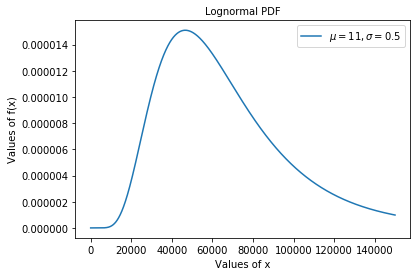

In [205]:
def trunc_lognorm_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, s=sigma, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, s=sigma, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.lognorm.cdf(cut_ub, s=sigma, loc=mu, scale=sigma) -
                       sts.lognorm.cdf(cut_lb, s=sigma, loc=mu, scale=sigma))
        
    pdf_vals = ((1/(sigma * xvals* np.sqrt(2 * np.pi))) * 
                np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2)) /
                prob_notcut)
                           
    return pdf_vals

xvals = np.linspace(0, 150000, 10000)
mu = 11
sigma = 0.5
probs = trunc_lognorm_pdf(xvals, mu, sigma, cut_lb=0, cut_ub=150000)
plt.plot(xvals, probs, label='$\mu=11,\sigma=0.5$')
plt.legend(loc='upper right')
plt.title("Lognormal PDF", fontsize=10)
plt.xlabel('Values of x')
plt.ylabel('Values of f(x)')

In [206]:
def log_lik_trunclognorm(xvals, mu, sigma, cut_lb, cut_ub):
    pdf_vals = trunc_lognorm_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

log_lik_b = log_lik_trunclognorm(incomes, mu, sigma, cut_lb=0, cut_ub=150000)
print("The log likelihood value for this parameterization of the distribution and given the income data is", log_lik_b)

The log likelihood value for this parameterization of the distribution and given the income data is -2385.856997808558


#### (c)

In [207]:
def crit(params, *args):
    mu, sigma = params
    xvals, cut_lb, cut_ub = args
    log_lik_val = log_lik_trunclognorm(xvals, mu, sigma, cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

mu_init = 11  
sig_init = 0.4
params_init = np.array([mu_init, sig_init])
mle_args = (incomes, 0, 150000)
results = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sig_MLE = results.x
print("The ML estimates for mu and sigma are:")
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print("The value of the log likelihood function is", -results.fun)
print("The variance covariance matrix of the estimates: ", results.hess_inv)

The ML estimates for mu and sigma are:
mu_MLE= 11.359022994317854  sig_MLE= 0.20817731901290074
The value of the log likelihood function is -2241.7193013573583
The variance covariance matrix of the estimates:  [[ 2.17640921e-04 -1.54042656e-07]
 [-1.54042656e-07  1.08718806e-04]]


/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


Text(0, 0.5, 'Percent of incomes')

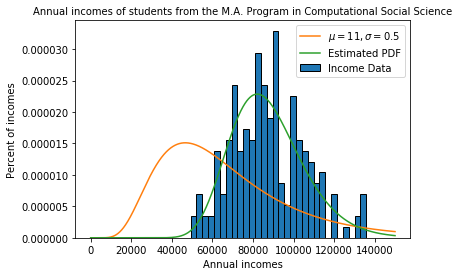

In [208]:
probs = trunc_lognorm_pdf(xvals, mu, sigma, cut_lb=0, cut_ub=150000)
probs_ML = trunc_lognorm_pdf(xvals, mu_MLE, sig_MLE, cut_lb=0, cut_ub=150000)
num_bins = 30
plt.hist(incomes, num_bins, density=True, edgecolor='k', label='Income Data')
plt.plot(xvals, probs, label='$\mu=11,\sigma=0.5$')
plt.plot(xvals, probs_ML, label="Estimated PDF")
plt.title('Annual incomes of students from the M.A. Program in Computational Social Science', fontsize=10)
plt.legend(loc='upper right')
plt.xlabel('Annual incomes')
plt.ylabel('Percent of incomes')

#### (d)

In [209]:
log_lik_h0 = log_lik_trunclognorm(incomes, mu_new, sig_new, 0, 150000)
print('Hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_trunclognorm(incomes, mu_MLE, sig_MLE, 0, 150000)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('The likelihood ratio value is', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('The p-value with 2 degrees of freedom  = ', pval_h0)

Hypothesis value log likelihood -2385.856997808558
MLE log likelihood -2241.7193013573583
The likelihood ratio value is 288.2753929023993
The p-value with 2 degrees of freedom  =  0.0


So we reject the null hypothesis that the data in incomes.txt came from the distribution in part (b).

#### (e)

In [210]:
p1 = 1 - sts.lognorm.cdf(100000, s=sig_MLE, scale=np.exp(mu_MLE))
p2 = sts.lognorm.cdf(75000, s=sig_MLE, scale=np.exp(mu_MLE))
print("The probability of me earning more than $100,000 is", p1)
print("The probability of me earning less than $75,000 is", p2)

The probability of me earning more than $100,000 is 0.22986683007662623
The probability of me earning less than $75,000 is 0.26023427080361317


### Problem 2

In [211]:
sick_data = np.loadtxt("data/sick.txt", delimiter=',', skiprows=1)
sick_data = sick_data.transpose()

In [212]:
def log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sigma):
    epsilons = y - b0 - b1 * x1 - b2 * x2 - b3 * x3
    probs = sts.norm.pdf(epsilons, loc=0, scale=sigma)
    ln_pdf_vals = np.log(probs)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit2(params, *args):
    b0, b1, b2, b3, sigma = params
    y, x1, x2, x3 = args
    log_lik_val = log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

params_init = np.array([0.1, 0, 0, 0, 1])
y = sick_data[0]
x1 = sick_data[1]
x2 = sick_data[2]
x3 = sick_data[3]
results = opt.minimize(crit2, params_init, args=(y, x1, x2, x3))
b0 = results.x[0]
b1 = results.x[1]
b2 = results.x[2]
b3 = results.x[3]
sigma = results.x[4]
print("The estimated parameters are:", b0, b1, b2, b3, sigma ** 2)
print("The value of the log likelihood function is", -results.fun)
print("The variance covariance matrix of the estimates: ", results.hess_inv)

The estimated parameters are: 0.25164647528371814 0.012933391222553835 0.4005017191612674 -0.009991697005885754 9.105625197348597e-06
The value of the log likelihood function is 876.865049102402
The variance covariance matrix of the estimates:  [[ 6.48840157e-07  1.61974605e-08 -2.23940498e-07 -1.98871070e-08
   7.93722027e-09]
 [ 1.61974605e-08  2.85109753e-09 -2.54206971e-08 -1.96247302e-09
   1.45879130e-10]
 [-2.23940498e-07 -2.54206971e-08  2.70790495e-07  1.75854907e-08
   2.38983037e-10]
 [-1.98871070e-08 -1.96247302e-09  1.75854907e-08  1.54279249e-09
  -3.44897580e-10]
 [ 7.93722027e-09  1.45879130e-10  2.38983037e-10 -3.44897580e-10
   1.51351528e-08]]


/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


#### (b)

In [213]:
b0_test = 1
b1_test = 0
b2_test = 0
b3_test = 0
sigma_test = 0.1
log_lik_h0 = log_lik_norm(y, x1, x2, x3, b0_test, b1_test, b2_test, b3_test, sigma_test)
print('Hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sigma)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('The likelihood ratio value is', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('The p-value with 2 degrees of freedom  = ', pval_h0)

Hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.865049102402
The likelihood ratio value is 6261.131474289054
The p-value with 2 degrees of freedom  =  0.0


So we reject the null hypothesis that age, number of children, and average winter temperature have no effect on the number of sick days.